# The main jupyter notebook for group three

> each will take this file and change it according to the question

## What is done in this notebook

- Data Loading and Initial Exploration:
    - Load the dataset into a pandas DataFrame.
    - Display the first 5 rows and check the data types of all columns.
    - Identify and handle any missing values.
    - List all unique Country values in the dataset.

In [66]:
# Basic command
import numpy as np
import pandas as pd 

In [67]:
# Open the File as a DataFram
df = pd.read_csv(r"./processed_microplastics.csv")

In [68]:
df.head(5)

,year,country,cheese,yoghurt,total_milk,fruits,refined_grains,whole_grains,nuts_and_seeds,total_processed_meats,...,fish,shellfish,eggs,total_salt,added_sugars,non-starchy_vegetables,potatoes,other_starchy_vegetables,beans_and_legumes,total_ug_per_kg
0,1990,Angola,0.191781,54.899739,96.602740,76.520548,481.297149,44.309838,2.849315,22.770109,...,53.013699,0.164384,1.041096,8.005259,32.547945,80.164384,8.109589,39.342466,19.835616,1043.279108
1,1990,Benin,0.054795,9.365946,18.410959,90.876712,534.256965,48.836323,19.561644,17.018264,...,18.794521,3.972603,2.849315,5.854497,8.246575,122.986301,0.000000,304.904110,21.178082,1241.656197
2,1990,Burkina Faso,0.273973,35.390618,56.027397,19.178082,213.170183,129.416119,28.465753,9.541329,...,4.684932,0.000000,6.767123,6.928378,9.534247,64.767123,2.219178,13.780822,32.520548,666.603927
3,1990,Central African Republic,0.000000,19.206478,48.000000,113.397260,285.035375,302.567776,23.506849,26.412094,...,13.917808,0.000000,1.123288,6.585071,19.698630,101.753425,0.575342,209.452055,12.821918,1237.339905
4,1990,Cote D'Ivoire,0.301370,2.220447,38.109589,37.013699,436.907598,25.220347,16.904110,2.459103,...,51.424658,0.493151,2.438356,9.660915,28.438356,151.150685,1.945205,676.575343,2.356164,1540.502458


In [69]:
# See the Columns
df.dtypes

year                          int64
country                      object
cheese                      float64
yoghurt                     float64
total_milk                  float64
fruits                      float64
refined_grains              float64
whole_grains                float64
nuts_and_seeds              float64
total_processed_meats       float64
unprocessed_red_meats       float64
fish                        float64
shellfish                   float64
eggs                        float64
total_salt                  float64
added_sugars                float64
non-starchy_vegetables      float64
potatoes                    float64
other_starchy_vegetables    float64
beans_and_legumes           float64
total_ug_per_kg             float64
dtype: object

In [70]:
# Check for any missing values - none found
df.isnull().sum()

# Drop NaN values - not necessary here because no such value was found
df = df.dropna()

In [71]:
# Print unique values for the column "country"
df["country"].unique()

array(['Angola', 'Benin', 'Burkina Faso', 'Central African Republic',
       "Cote D'Ivoire", 'Cameroon', 'Congo', 'Djibouti', 'Algeria',
       'Egypt', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'The Gambia',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Morocco', 'Madagascar',
       'Mali', 'Mozambique', 'Mauritania', 'Mauritius', 'Malawi',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Chad', 'Togo',
       'Tunisia', 'Tanzania', 'Uganda', 'South Africa', 'Zambia',
       'Zimbabwe', 'Albania', 'Argentina', 'Antigua And Barbuda',
       'Australia', 'Austria', 'Bangladesh', 'Bulgaria', 'Bolivia',
       'Brazil', 'Barbados', 'Canada', 'Switzerland', 'China', 'Colombia',
       'Cuba', 'Germany', 'Dominica', 'Denmark', 'Dominican Republic',
       'Spain', 'France', 'United Kingdom', 'Greece', 'Grenada',
       'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq',
       'Iceland', 'Jordan', 'Japan', 'Cambodia', 'South Korea', 'Kuwait',
       'Laos', 'Saint Lucia', 

> delete the quesitons which you will not answer, answer each question with a sufficient amount of blocks and document as needed.

## Beginner Task

- Overall Trends in Microplastic Consumption:
    - What is the average total_ug_per_kg across all countries and years in the dataset?
    - How has the global average total_ug_per_kg changed over the years (1990-2018)? Visualize this trend.

In [72]:
# Print the golabal average total_ug_per_kg
average = df["total_ug_per_kg"].mean()
print(average)

1600.6145743153152


1. Import of the libraries we need for visualization
2. I looked up how to do visualization with a website that explains EDA for Python
3. Insert the function for a line chart and label it
4. I put a grid in the back and the dots at every "change point"

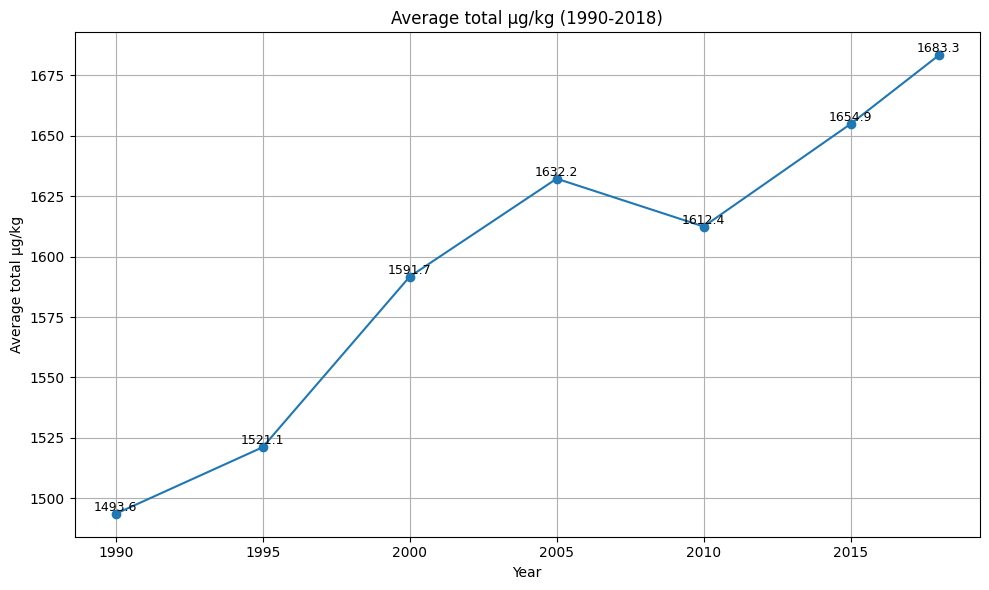

In [73]:
# Print how the global average total_ug_per_kg has changed over the years (1990-2018)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

yearaverage = df.groupby("year")["total_ug_per_kg"].mean()

# Plot the line chart
ax = yearaverage.plot(marker='o', figsize=(10, 6))
plt.title("Average total µg/kg (1990-2018)")
plt.xlabel("Year")
plt.ylabel("Average total µg/kg")


# Add value annotations
for x, y in zip(yearaverage.index, yearaverage.values):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

- Top Food Contributors:
    - Which 3 food categories (product columns, e.g., fish, poultry, vegetables) show the highest average microplastic consumption (μg/kg) across all countries and years?
    - Visualize the average microplastic content for the top 10 food categories.

In [74]:
mean_list = []
def sorting_by_avg(key):
    return key[1]
food_columns = df.columns[2:-1]
for column in food_columns:
    mean_list.append([column, df[column].mean()])
mean_list.sort(key = sorting_by_avg, reverse=True)
for category, average in mean_list[:3]:
    print(category)

top_categories = [category for category, i in mean_list[:3]]
print(top_categories)


refined_grains
total_milk
non-starchy_vegetables
['refined_grains', 'total_milk', 'non-starchy_vegetables']


- Country-Level Totals:
    - Which 5 countries have the highest average total_ug_per_kg over the entire period (1990-2018)?
    - Which 5 countries have the lowest average total_ug_per_kg?

- Initial Time-Series for a Food Category:
    - Choose one of the top 3 food categories identified in question 3. How has the microplastic content in this specific food category changed over time (1990-2018) globally? Visualize this trend.

## Intermediate Task

- Detailed Food Category Analysis:
    - For the top 3 food categories with the highest microplastic content, analyze their individual trends over time (1990-2018). Are some increasing more rapidly than others?
    - Compare the contribution of different food categories to the total_ug_per_kg in the earliest (1991) and latest (2018) years. Describe the shifts in contribution.

1. First I wanted to visualize how the top 3 categories evolved over time. I saw that if I take them just like that it doesn't give me the graph I'm looking for, so I realized I need to group them for each year, as for every year there's many countries. By grouping I have only one value per year and can draw the graph easily to compare.
2. After drawing the graph, I also wanted to calculate the increasment and not just see it. That's why I used slope. I put everything in a dictionary to later sort it accordingly
3. Then I printed a sorted list going from fastest increasement to slowest. And at the end the result = fastest incresing category.

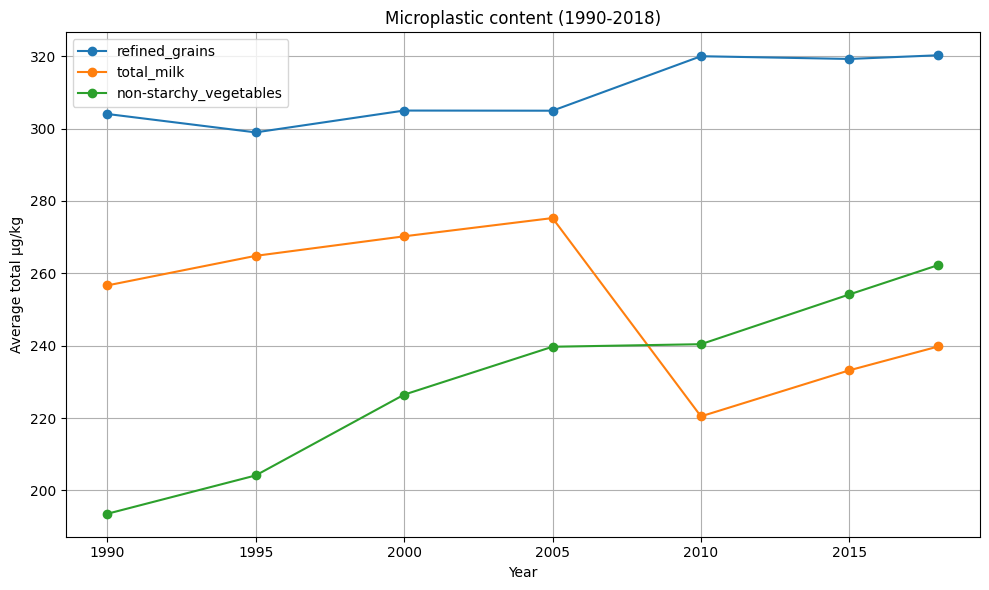

In [75]:
#Find out the average per year of all countries together for the top 3 food categories
avg_highest = df.groupby("year")[top_categories[0:3]].mean()

#Plot a line chart to visualize the trends of each category
ax = avg_highest.plot(marker='o', figsize=(10, 6))

plt.title("Microplastic content (1990-2018)")
plt.xlabel("Year")
plt.ylabel("Average total µg/kg")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [76]:
#Create a new dictionary for the results
results = {}

#Use slope to calculate the increasment
for cat in top_categories[0:3]:
    y = avg_highest[cat].values
    x = avg_highest.index.values
    slope = np.polyfit(x, y, 1)[0]
    results[cat] = slope

#Make an order from fastest to slowest increasment
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
for cat, slope in sorted_results.items():
    print(f"{cat}: {slope:.2f} µg/kg per year")

print()

#Print the category with the fastest increasment
fastest = max(results, key=results.get)
print(f"Fastest increasment: {fastest} ({results[fastest]:.2f} µg/kg per year)")


non-starchy_vegetables: 2.39 µg/kg per year
refined_grains: 0.78 µg/kg per year
total_milk: -1.23 µg/kg per year

Fastest increasment: non-starchy_vegetables (2.39 µg/kg per year)


- Country-Specific Microplastic Profiles:
    - Select two countries with significantly different average total_ug_per_kg (one high, one low, from your beginner analysis).
    - For each selected country, visualize the breakdown of total_ug_per_kg by different food categories for the year 2018. Highlight the food categories contributing most to microplastic intake in these specific countries.


- Growth Rate Analysis:
    - Calculate the percentage increase in total_ug_per_kg from 1990 to 2018 for each country. Identify the top 5 countries with the highest growth rate in microplastic consumption.
    - Investigate which food categories are driving this growth in those top 5 countries.

- Correlation between Food Groups (Optional/Advanced):
    - Is there a correlation between microplastic content in different food groups? For example, do countries with high microplastic in fish also tend to have high microplastic in seafood or processed_foods? Use correlation matrices or scatter plots to explore.


### Public Health Implications & Recommendations (Qualitative):
- Based on your findings, what are 2-3 key insights you would present to the PurePlate Initiative regarding microplastic consumption?
- Propose potential policy recommendations or public awareness strategies that could help reduce human exposure to microplastics through diet, citing evidence from your analysis.

> Remember to provide clear visualizations and concise explanations for all your findings. Your analysis will contribute directly to a vital public health discussion!
